<a href="https://colab.research.google.com/github/tokage5/ML_kadai/blob/main/kaggle_House_Price_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Goal: predict sakes price for each house.
#Metric:RMSE

In [192]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [193]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [194]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [195]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [196]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [197]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [198]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [22]:
#説明変数に使うパラメータを選択：1 MSSubClass The building class, LotArea: Lot size in square feet, LandContour: Flatness of the property, YearBuilt: Original construction date,YearRemodAdd: Remodel date, "MiscVal": $Value of miscellaneous feature
#selected_columns = ["MSSubClass", "MSZoning", "LotArea","LotShape", "LandContour", "Utilities", "OverallQual", "OverallCond", "YearBuilt","YearRemodAdd", "MiscVal" ]
#df_train = df_train [selected_columns]


In [200]:
codes = pd.get_dummies(df_train["LandContour"])
df_train = pd.concat([df_train, codes], axis = 1)

In [201]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bnk,HLS,Low,Lvl
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,0,0,0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,0,0,0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0,0,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,0,0,0,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,0,0,0,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2500,5,2010,WD,Normal,266500,0,0,0,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,0,0,0,1


In [202]:
codes2 = pd.get_dummies(df_test["LandContour"])
df_test = pd.concat([df_test, codes2], axis = 1)

In [ ]:
df_test

In [204]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
SaleCondition      0
Bnk                0
HLS                0
Low                0
Lvl                0
Length: 84, dtype: int64

In [205]:
selected_columns = ["MSSubClass", "LotArea", "Bnk", "HLS","Low", "Lvl", "YearBuilt","YearRemodAdd", "MiscVal" ]
x = df_train [selected_columns]
y = df_train["SalePrice"]

In [206]:
x

,MSSubClass,LotArea,Bnk,HLS,Low,Lvl,YearBuilt,YearRemodAdd,MiscVal
0,60,8450,0,0,0,1,2003,2003,0
1,20,9600,0,0,0,1,1976,1976,0
2,60,11250,0,0,0,1,2001,2002,0
3,70,9550,0,0,0,1,1915,1970,0
4,60,14260,0,0,0,1,2000,2000,0
...,...,...,...,...,...,...,...,...,...
1455,60,7917,0,0,0,1,1999,2000,0
1456,20,13175,0,0,0,1,1978,1988,0
1457,70,9042,0,0,0,1,1941,2006,2500
1458,20,9717,0,0,0,1,1950,1996,0


In [207]:
x.isnull().sum()

MSSubClass      0
LotArea         0
Bnk             0
HLS             0
Low             0
Lvl             0
YearBuilt       0
YearRemodAdd    0
MiscVal         0
dtype: int64

In [150]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [208]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 1, min_samples_split= 2)
model.fit(x, y)


DecisionTreeRegressor(max_depth=5)

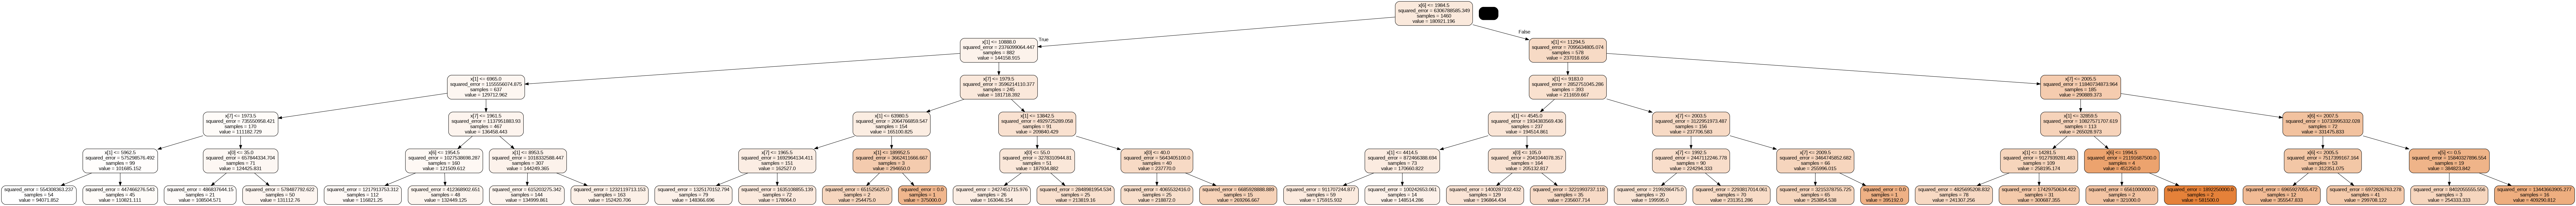

In [209]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

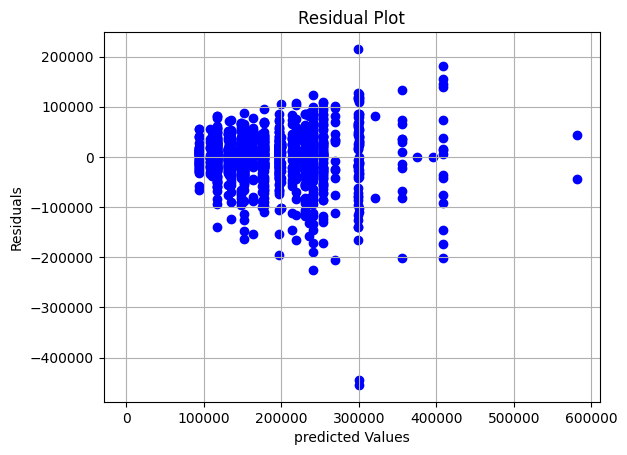

In [210]:
y_pred = model.predict(x)
plt.scatter(y_pred, y_pred-y, color = "blue")
plt.hlines(y=0, xmin = -10, xmax = 20, color = "black")

plt.title("Residual Plot")
plt.xlabel("predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [211]:
from sklearn.metrics import mean_squared_error
print("MSE: (train)", mean_squared_error(y, model.predict(x)))

mse =mean_squared_error(y, model.predict(x))
rmse = np.sqrt(mse)
print(rmse)

MSE: (train) 2329037399.4442697
48260.101527496496


In [212]:
from sklearn.metrics import r2_score
print("r^2 (train):", r2_score(y, model.predict(x)))

r^2 (train): 0.6307094541182758


In [214]:
x_test = df_test [selected_columns]

In [215]:
x_test

,MSSubClass,LotArea,Bnk,HLS,Low,Lvl,YearBuilt,YearRemodAdd,MiscVal
0,20,11622,0,0,0,1,1961,1961,0
1,20,14267,0,0,0,1,1958,1958,12500
2,60,13830,0,0,0,1,1997,1998,0
3,60,9978,0,0,0,1,1998,1998,0
4,120,5005,0,1,0,0,1992,1992,0
...,...,...,...,...,...,...,...,...,...
1454,160,1936,0,0,0,1,1970,1970,0
1455,160,1894,0,0,0,1,1970,1970,0
1456,20,20000,0,0,0,1,1960,1996,0
1457,85,10441,0,0,0,1,1992,1992,700


In [216]:
predict_x_test=model.predict(x_test)

In [217]:
predict_x_test.shape

(1459,)

In [218]:
print(predict_x_test)

[148366.69620253 148366.69620253 241307.25641026 ... 218872.
 199595.         231351.28571429]


In [219]:
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": predict_x_test })

In [225]:
submission.to_csv("submission_House_Price_DecisionTree_v1.csv", index = False)

In [137]:
#LotFrontageを説明変数から抜いた場合
selected_columns = ["MSSubClass", "LotArea", "YearBuilt","YearRemodAdd", "MiscVal" ]
x = df_train [selected_columns]
y = df_train["SalePrice"]

In [138]:
x

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MiscVal
0,60,8450,2003,2003,0
1,20,9600,1976,1976,0
2,60,11250,2001,2002,0
3,70,9550,1915,1970,0
4,60,14260,2000,2000,0
...,...,...,...,...,...
1455,60,7917,1999,2000,0
1456,20,13175,1978,1988,0
1457,70,9042,1941,2006,2500
1458,20,9717,1950,1996,0


In [139]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 1, min_samples_split= 2)
model.fit(x, y)

DecisionTreeRegressor(max_depth=3)

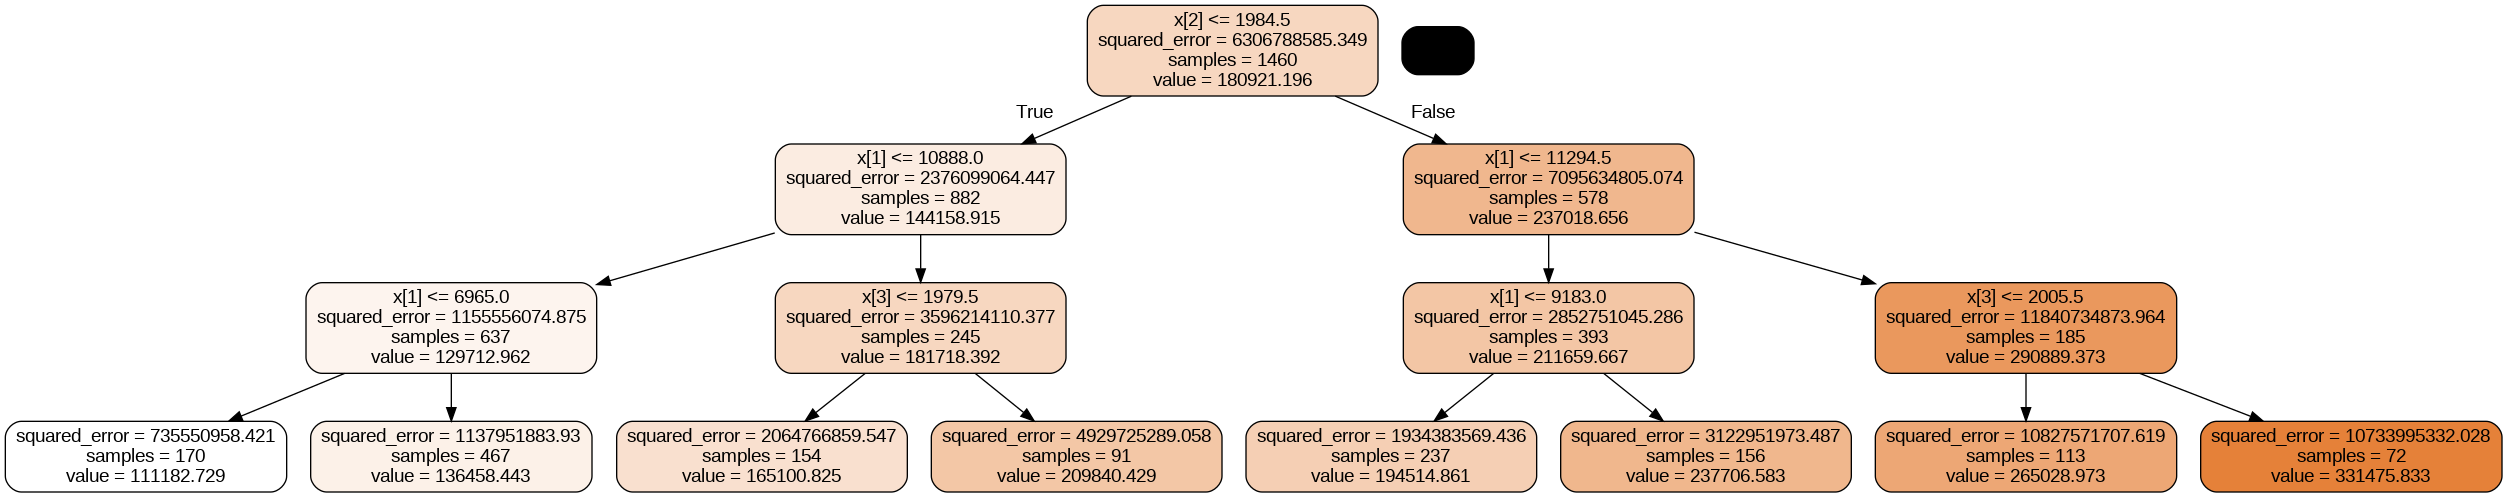

In [140]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

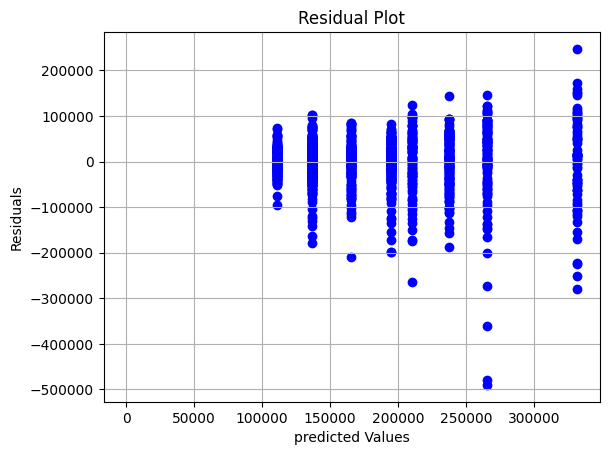

In [141]:
y_pred = model.predict(x)
plt.scatter(y_pred, y_pred-y, color = "blue")
plt.hlines(y=0, xmin = -10, xmax = 20, color = "black")

plt.title("Residual Plot")
plt.xlabel("predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
print("MSE: (train)", mean_squared_error(y, model.predict(x)))

mse =mean_squared_error(y, model.predict(x))
rmse = np.sqrt(mse)
print(rmse)

MSE: (train) 2989752719.9236937
54678.63129160873


In [143]:
from sklearn.metrics import r2_score
print("r^2 (train):", r2_score(y, model.predict(x)))

r^2 (train): 0.5259468936585405
